# IMAGE CLASSIFICATION

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import load_model
import os

In [4]:
import pandas as pd
import numpy as np

In [5]:
from zipfile import ZipFile

In [19]:
from zipfile import ZipFile
file_name = "Images.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [24]:
file_name

'Images.zip'

In [34]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D



In [35]:
!pip install opencv-python

In [36]:
import cv2 as cv2

In [41]:
import matplotlib.pyplot as plt

# Loading data from the zip folder

In [38]:
Data="C:/Users/karti/Documents"

In [39]:
Call_names = ["Mens Jeans", "Mens Trousers", "Women Saree"]

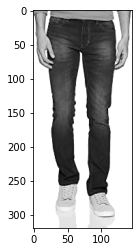

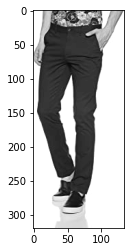

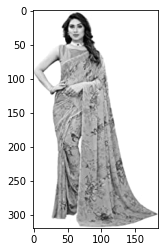

In [42]:
for category in Call_names:                                               # saree, trouser and jeans
    path = os.path.join(Data,category)                                    # create path for saree, trouser and jeans
    for img in os.listdir(path):                                          # iterate over each image per saree, trouser and jeans
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # converting image into an array
        plt.imshow(img_array, cmap='gray')                                    # using imshow plotting a graph 
        plt.show()                                                            # display!
        break                                                                 # considering one

In [44]:
img_array.shape

(320, 183)

In [45]:
img_array

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [46]:
img_width, img_height=50,50

# Setting dimensions of the image

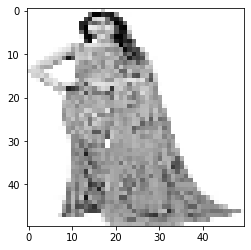

In [47]:
new_array = cv2.resize(img_array, (img_width, img_height))
plt.imshow(new_array, cmap='gray')
plt.show()

In [50]:
!pip3 install tqdm

In [58]:
from tqdm import tqdm

# Creating our training data 

In [59]:
traindf=[]

def training_data():
    for i in Call_names:  #jeans, sarees and trousers
        path=os.path.join(Data,i)
        
        
        class_count=Call_names.index(i)#classifying the image categories
        
        for img in tqdm(os.listdir(path)): #Here we are iterating over each image
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)#converting the images into array
                new_array=cv2.resize(img_array,(img_width,img_height))
                traindf.append([new_array,class_count])
              
            except Exception as e:
                pass
training_data()
print(len(traindf))

100%|███████████████████████████████████████████████████████████████████████████████| 209/209 [00:01<00:00, 163.87it/s]

689


In [60]:
import random

random.shuffle(traindf)# Here we are shuffling the data like we do with a deck of cards so that each card drawn is random. So that there is no sequence i.e Saree first and jeans last . The images are in random order

In [61]:
for i in traindf[:10]:
    print(i[1])

0
1
2
0
2
2
2
1
1
0


In [63]:
X=[]
y=[]

for image,label in traindf:
    X.append(image)
    y.append(label)
    
X = np.array(X).reshape(-1, img_width, img_height, 1)
y = np.array(y)



# Normalizing the data

In [64]:
# Here we scale the data by dividing the data by 255 as the pixel value for max in 255 and min is 0
X = X/255.0

# Building the deep learning model

In [66]:

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# Here we are creating a CNN base using sequential

In [67]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening to 1D and adding dense layers

In [68]:
model.add(Flatten()) 

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 256)       2560      
_________________________________________________________________
activation (Activation)      (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0

# Compilation of the model

In [70]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [71]:
model.fit(X, y, batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
20/20 [==============================] - 12s 582ms/step - loss: -32.4956 - accuracy: 0.3565 - val_loss: -217.9114 - val_accuracy: 0.3913
Epoch 2/5
20/20 [==============================] - 11s 554ms/step - loss: -1316.6898 - accuracy: 0.3726 - val_loss: -3581.1780 - val_accuracy: 0.3913
Epoch 3/5
20/20 [==============================] - 11s 562ms/step - loss: -10685.0000 - accuracy: 0.3548 - val_loss: -23584.8555 - val_accuracy: 0.3913
Epoch 4/5
20/20 [==============================] - 11s 539ms/step - loss: -57668.2969 - accuracy: 0.3532 - val_loss: -107938.4453 - val_accuracy: 0.3768
Epoch 5/5
20/20 [==============================] - 11s 543ms/step - loss: -218442.4531 - accuracy: 0.3565 - val_loss: -336229.8750 - val_accuracy: 0.3768
